In [1]:
from tensorflow.python.framework.random_seed import set_random_seed

In [2]:

from numpy.random import seed
seed(123)

from tensorflow.python.framework.random_seed import set_random_seed
set_random_seed(123)


import numpy as np
import pandas as pd

import imageio

import matplotlib.pyplot as plt
%matplotlib inline

import os
print(os.listdir("/Users/nouf/Desktop/archive"))

['.DS_Store', 'dataA', 'dataB', 'dataE', 'dataD', 'dataC']


In [3]:
image_path = '/Users/nouf/Desktop/archive/dataA/dataA/CameraRGB/'
mask_path = '/Users/nouf/Desktop/archive/dataA/dataA/CameraSeg/'
image_list = os.listdir(image_path)
mask_list = os.listdir(mask_path)
image_list = [image_path+i for i in image_list]
mask_list = [mask_path+i for i in mask_list]

In [4]:
image_list

['/Users/nouf/Desktop/archive/dataA/dataA/CameraRGB/F7-31.png',
 '/Users/nouf/Desktop/archive/dataA/dataA/CameraRGB/03_00_190.png',
 '/Users/nouf/Desktop/archive/dataA/dataA/CameraRGB/F9-20.png',
 '/Users/nouf/Desktop/archive/dataA/dataA/CameraRGB/06_00_220.png',
 '/Users/nouf/Desktop/archive/dataA/dataA/CameraRGB/05_00_010.png',
 '/Users/nouf/Desktop/archive/dataA/dataA/CameraRGB/09_00_241.png',
 '/Users/nouf/Desktop/archive/dataA/dataA/CameraRGB/10_00_090.png',
 '/Users/nouf/Desktop/archive/dataA/dataA/CameraRGB/F3-41.png',
 '/Users/nouf/Desktop/archive/dataA/dataA/CameraRGB/F68-90.png',
 '/Users/nouf/Desktop/archive/dataA/dataA/CameraRGB/09_00_080.png',
 '/Users/nouf/Desktop/archive/dataA/dataA/CameraRGB/F4-60.png',
 '/Users/nouf/Desktop/archive/dataA/dataA/CameraRGB/03_01_181.png',
 '/Users/nouf/Desktop/archive/dataA/dataA/CameraRGB/F66-81.png',
 '/Users/nouf/Desktop/archive/dataA/dataA/CameraRGB/04_00_120.png',
 '/Users/nouf/Desktop/archive/dataA/dataA/CameraRGB/F8-60.png',
 '/Use

Text(0.5, 1.0, 'Segmentation')

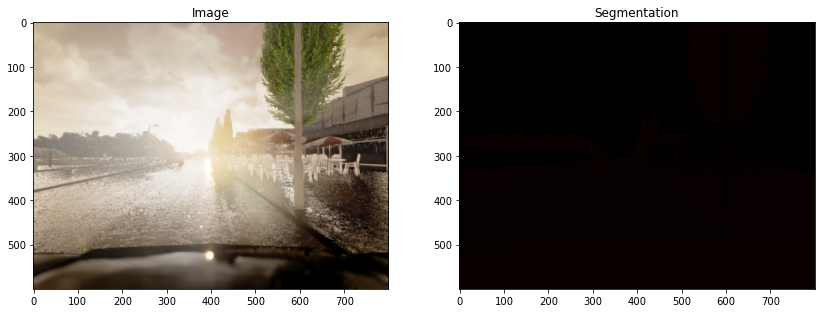

In [9]:
N = 0
img = imageio.imread(image_list[N])
mask = imageio.imread(mask_list[N])

fig, arr = plt.subplots(1, 2, figsize=(14, 10))
arr[0].imshow(img)
arr[0].set_title('Image')
arr[1].imshow(mask, cmap='Paired')
arr[1].set_title('Segmentation')

Text(0.5, 1.0, 'Segmentation2')

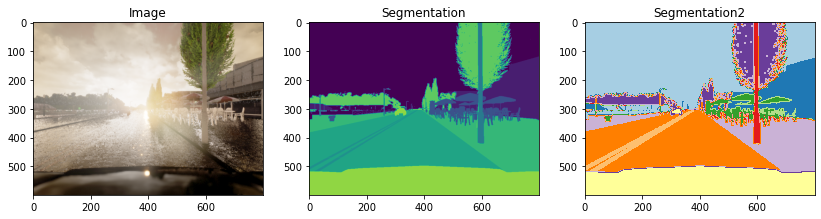

In [19]:
N = 0
img = imageio.imread(image_list[N])
mask = imageio.imread(mask_list[N])
mask = np.array([max(mask[i, j]) for i in range(mask.shape[0]) for j in range(mask.shape[1])]).reshape(img.shape[0], img.shape[1])

fig, arr = plt.subplots(1, 3, figsize=(14, 10))

arr[0].imshow(img)
arr[0].set_title('Image')

arr[1].imshow(mask)
arr[1].set_title('Segmentation')

arr[2].imshow(mask, cmap='Paired')
arr[2].set_title('Segmentation2')

In [20]:
from tqdm import tqdm

In [21]:
height, width = 600, 800
images = np.zeros((len(image_list), height, width, 3), dtype=np.int16)
masks = np.zeros((len(image_list), height, width, 1), dtype=np.int8)

for n in tqdm(range(len(image_list))):
    img = imageio.imread(image_list[n])
    
    mask = imageio.imread(mask_list[n])
    mask_road = np.zeros((600, 800, 1), dtype=np.int8)
    mask_road[np.where(mask==7)[0], np.where(mask==7)[1]]=1
    
    images[n] = img
    masks[n] = mask_road

100%|██████████| 1000/1000 [00:39<00:00, 25.08it/s]


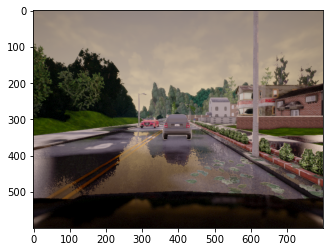

In [24]:
plt.imshow(images[1])

In [26]:
np.random.seed(123)
shuffle_ids = np.array([i for i in range(len(masks))])
np.random.shuffle(shuffle_ids)
train_ids = shuffle_ids[:int(len(masks)*0.8)]
val_ids = shuffle_ids[int(len(masks)*0.8):int(len(masks)*0.8+100)]
test_ids = shuffle_ids[int(len(masks)*0.8+100):]

In [31]:
train_images, train_masks = images[train_ids], masks[train_ids]
val_images, val_masks = images[val_ids], masks[val_ids]
test_images, test_masks = images[test_ids], masks[test_ids]

In [32]:
train_images.shape

(800, 600, 800, 3)

In [33]:
val_images.shape

(100, 600, 800, 3)

In [34]:
test_images.shape

(100, 600, 800, 3)